# K-Means Clustering and K-Nearest Neighbours

In this session we will try to get a high level intuition of how KNN method of classification works and what it is exactly.

## So what is K-Means Clustering anyways?
It's an unsupervised classfication based Machine Learning algorithm which means you just present the model with some data with no labels or tags
and expect it to do the labelling for you.
<img src="assets/unlabelled.png" width="800px"/>
<br />
And once it's done labelleling the dataset you can use this model for new data points to predict which class it comes under.

<img src="assets/clustering.png" width="800px"/>

#### As shown above a list of point that aren't classified in the beginning get classified by the K-means algorithm and make classes and relations that 
#### sometimes even humans can't see.

### Let's jump right in and make a rudimentary K-means classifier on 1 dimensional data.

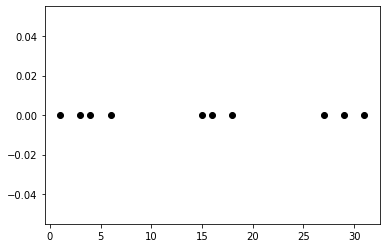

In [1]:
# Let's start with making a small data set 
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,3,4,6,15,16,18,27,29,31])
data_y = np.zeros(len(data))
plt.plot(data,data_y,'ko')
plt.show()

In [2]:
# Now we come to the clustering portion- selecting the k value is usually done by experimentation and variance bias calculations
# Since we can clearly see that there are 3 distinct classes let's take k to be equal to 3

# Let's select 3 random points
import random
random_int = random.sample(range(0,10),3)
red,blue,green = data[[i for i in random_int]]
print(f'red :{red}, blue: {blue}, green: {green}')
# we'll call the first index as red, second as blue and third green

red :27, blue: 3, green: 15


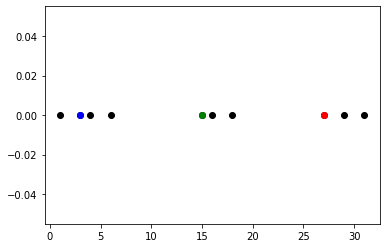

In [3]:
plt.plot(data,data_y,'ko')
plt.plot(red,0,'ro')
plt.plot(blue,0,'bo')
plt.plot(green,0,'go')

plt.show()

In [4]:
# Now we run over the entire list of data points to see which points are closest to which colour

def classify(data,red,blue,green,epoch):
    for rep in range(epoch):
        red_points = []
        green_points = []
        blue_points = []
        for i in data:
            
            if(abs(i-red)<abs(i-blue)) and (abs(i-red)<abs(i-green)):
                red_points.append(i)
            elif(abs(i-blue)<abs(i-red)) and (abs(i-blue)<abs(i-green)):
                blue_points.append(i)
            else:
                green_points.append(i)
            if len(red_points):
                red = sum(red_points)/len(red_points)
            if len(blue_points):
                blue = sum(blue_points)/len(blue_points)
            if len(green_points):
                green = sum(green_points)/len(green_points)
    return red_points,blue_points,green_points

def display(data,colour):
    data_y = np.zeros(len(data))
    if(colour == 'red'):
        plt.plot(data,data_y,'ro')
    elif(colour == 'green'):
        plt.plot(data,data_y,'go')
    else:
        plt.plot(data,data_y,'bo')
    


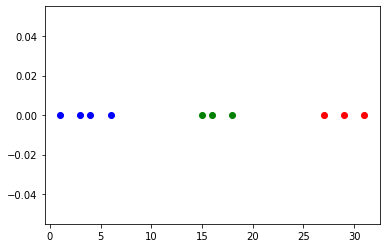

In [5]:
# On Iterating once we get this
red_points,blue_points,green_points = classify(data,red,blue,green,1)
display(red_points,'red')
display(blue_points,'blue')
display(green_points,'green')
plt.show()

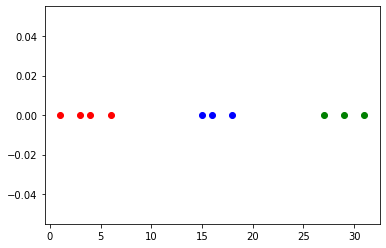

In [50]:
# Upon iterating several times we get the following markings
red_points,blue_points,green_points = classify(data,red,blue,green,5)
display(red_points,'red')
display(blue_points,'blue')
display(green_points,'green')
plt.show()
# Which is pretty much the classes that we can see visually in the first diagram
# Pretty cool right

#### Now say we have to classify which class a new data point falls under we just need to find the class that is closest to it
#### Basically comparing the new data to red,blue and green points at the end of training


## Now we proceed to use the k means classifier on The Mall Customer DataSet

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# loading dataset
data = pd.read_csv('./data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# there aren't any missing values
data.isnull().any().any()

False

In [9]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


/home/yangit/Shaastra_DS_ML_Intro/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yangit/Shaastra_DS_ML_Intro/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


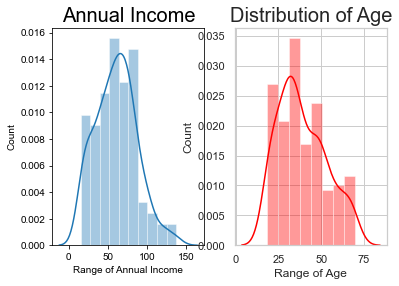

In [10]:
# Getting to know our dataset
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

#### We can infer two things from these two graphs:
* There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars
* The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in number as compared to the Middle aged people.

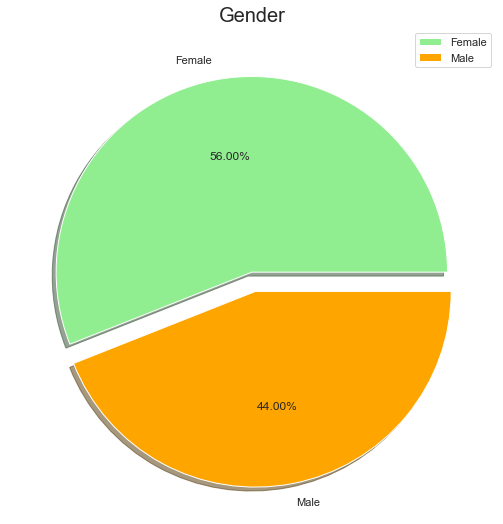

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
# Gender wise spending score comparision
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
size

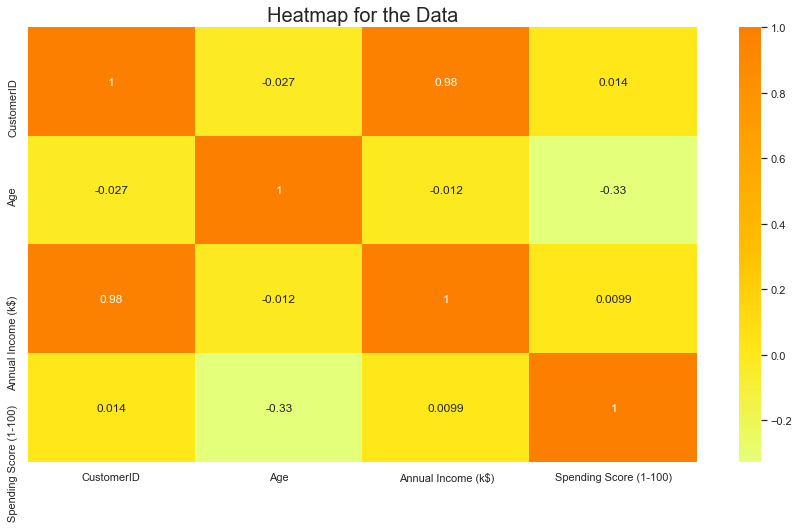

In [19]:
# We make heatmaps to establish the correlation between the attributes of each data point
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()
# We don't get any decent correlation between the features so we just consider all the attributes

/home/yangit/Shaastra_DS_ML_Intro/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/yangit/Shaastra_DS_ML_Intro/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


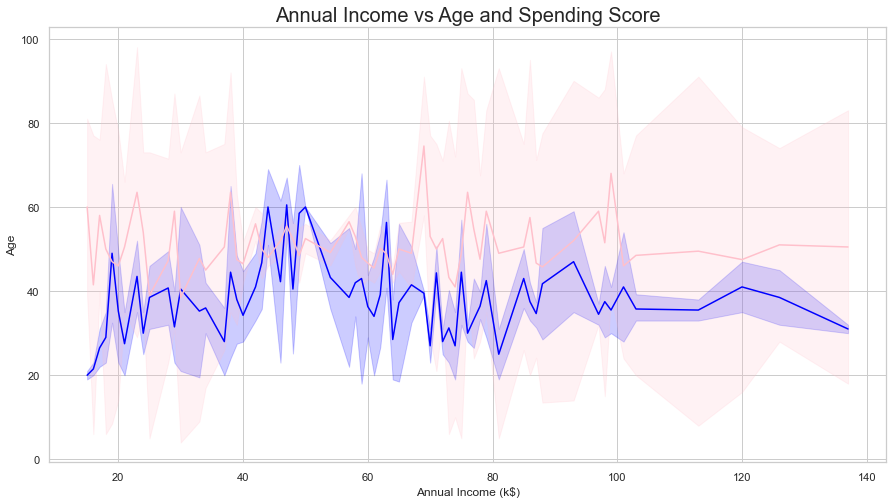

In [20]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [22]:
# From the above diagram we can say that there is a relatively good co-relation between spending scores vs age and annual income
# So we will be including those columns alone in our classification
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


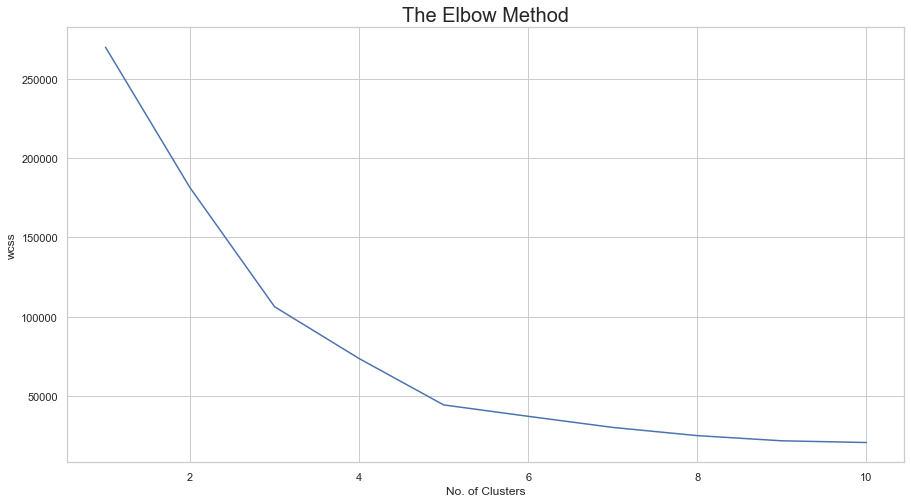

In [24]:
# Determining which value of k would be most suitable for the dataset
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### Elbow method to determine k value
* wcss is within cluster sum of squares
<br />
it's a method to determine the ideal k here the ideal value is 5 since after that "elbow" the drop is minimal. 

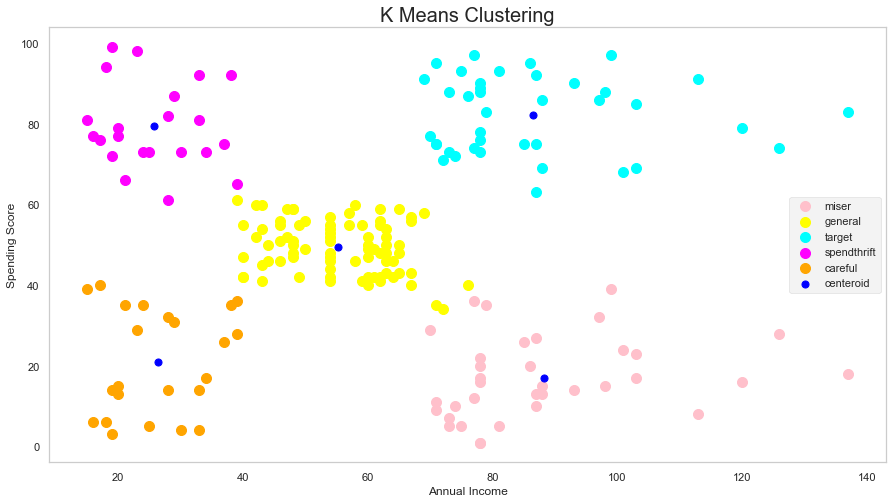

In [25]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## The five classes that we were able to segregate involve
* misers
* general
* target
* spendthrift
* careful

These are very important revelations as the mall can now target it's perfect audience inorder to maximize profitablity